In [2]:
import requests
import bs4

In [3]:
import IPython.display
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance

In [4]:
Pics = requests.get('https://www.timeanddate.com/weather/?sort=6&low=5')

In [5]:
Pics.ok


True

In [6]:
Pics.status_code

200

In [7]:
html = Pics.text

In [8]:
soup = bs4.BeautifulSoup(html,'lxml')

In [9]:
soup

<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
--><html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>World Temperatures — Weather Around The World</title><meta content="Weather forecast &amp; current weather worldwide in Fahrenheit or Celsius - hour-by-hour &amp; 2 week forecast plus last week's weather." name="description"/><meta content="max-image-preview:large" name="robots"/><meta content="https://www.timeanddate.com/scripts/weather_og.php?h1=Weather&amp;h2=Local%20Weather%20Around%20the%20World" property="og:image"/><meta content="1200" property="og:image:width"/><meta content="630" property="og:image:height"/><meta content="website" property="og:type"/><style>
@font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v8") format("woff2"),url("/common/fonts/iconfont.woff?v8") format("woff"),url("/common/fonts/iconfont.ttf?v8") format("truetype"),url

In [10]:
print(soup.prettify())
    

<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
-->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   World Temperatures — Weather Around The World
  </title>
  <meta content="Weather forecast &amp; current weather worldwide in Fahrenheit or Celsius - hour-by-hour &amp; 2 week forecast plus last week's weather." name="description"/>
  <meta content="max-image-preview:large" name="robots"/>
  <meta content="https://www.timeanddate.com/scripts/weather_og.php?h1=Weather&amp;h2=Local%20Weather%20Around%20the%20World" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="website" property="og:type"/>
  <style>
   @font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v8") format("woff2"),url("/common/fonts/iconfont.woff?v8") format("woff"),url("/common/fonts/

In [11]:
table = soup.find('table', class_='zebra fw tb-theme')
data = {}
cleaned_data = {}

In [12]:
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) >= 2:  # make sure there’s at least first and last
        name = cells[0].text.strip() 
        last = cells[3].text.strip() 
        
        data[name] = last

print(data)  

    

{"N'Djamena": '41\xa0°C', 'Niamey': '40\xa0°C', 'Muscat': '38\xa0°C', 'Kuwait City': '37\xa0°C', 'Cairo *': '35\xa0°C', 'Lagos': '34\xa0°C', 'Managua': '34\xa0°C', 'Baghdad': '34\xa0°C', 'Dhaka': '33\xa0°C', 'Doha': '33\xa0°C', 'Havana *': '33\xa0°C', 'Lahore': '33\xa0°C', 'Lomé': '33\xa0°C', 'Yamoussoukro': '32\xa0°C', 'Accra': '32\xa0°C', 'Bangui': '32\xa0°C', 'Caracas': '32\xa0°C', 'Chennai': '32\xa0°C', 'Dubai': '32\xa0°C', 'Islamabad': '32\xa0°C', 'Porto Novo': '32\xa0°C', 'Riyadh': '32\xa0°C', 'Houston *': '32\xa0°C', 'Abu Dhabi': '31\xa0°C', 'Belmopan': '31\xa0°C', 'Bissau': '31\xa0°C', 'Bridgetown': '31\xa0°C', 'Cancún': '31\xa0°C', 'Port-au-Prince *': '31\xa0°C', 'Rio Branco': '31\xa0°C', 'Tegucigalpa': '31\xa0°C', 'Miami *': '31\xa0°C', 'Mumbai': '31\xa0°C', 'New Orleans *': '31\xa0°C', 'Kingston': '30\xa0°C', 'Sri Jayawardenepura Kotte': '30\xa0°C', 'Asuncion': '30\xa0°C', 'Chicago *': '30\xa0°C', 'Karachi': '30\xa0°C', 'Kolkata': '30\xa0°C', 'Male': '30\xa0°C', 'Manama': '3

{"N'Djamena": '41°C', 'Niamey': '40°C', 'Muscat': '38°C', 'Kuwait City': '37°C', 'Cairo *': '35°C', 'Lagos': '34°C', 'Managua': '34°C', 'Baghdad': '34°C', 'Dhaka': '33°C', 'Doha': '33°C', 'Havana *': '33°C', 'Lahore': '33°C', 'Lomé': '33°C', 'Yamoussoukro': '32°C', 'Accra': '32°C', 'Bangui': '32°C', 'Caracas': '32°C', 'Chennai': '32°C', 'Dubai': '32°C', 'Islamabad': '32°C', 'Porto Novo': '32°C', 'Riyadh': '32°C', 'Houston *': '32°C', 'Abu Dhabi': '31°C', 'Belmopan': '31°C', 'Bissau': '31°C', 'Bridgetown': '31°C', 'Cancún': '31°C', 'Port-au-Prince *': '31°C', 'Rio Branco': '31°C', 'Tegucigalpa': '31°C', 'Miami *': '31°C', 'Mumbai': '31°C', 'New Orleans *': '31°C', 'Kingston': '30°C', 'Sri Jayawardenepura Kotte': '30°C', 'Asuncion': '30°C', 'Chicago *': '30°C', 'Karachi': '30°C', 'Kolkata': '30°C', 'Male': '30°C', 'Manama': '30°C', 'Nassau *': '30°C', 'Port of Spain': '30°C', 'Phoenix': '29°C', 'Washington DC *': '29°C', 'Bishkek': '29°C', 'Bamako': '29°C', 'Conakry': '29°C', 'Fortaleza'

NameError: name 'merged' is not defined

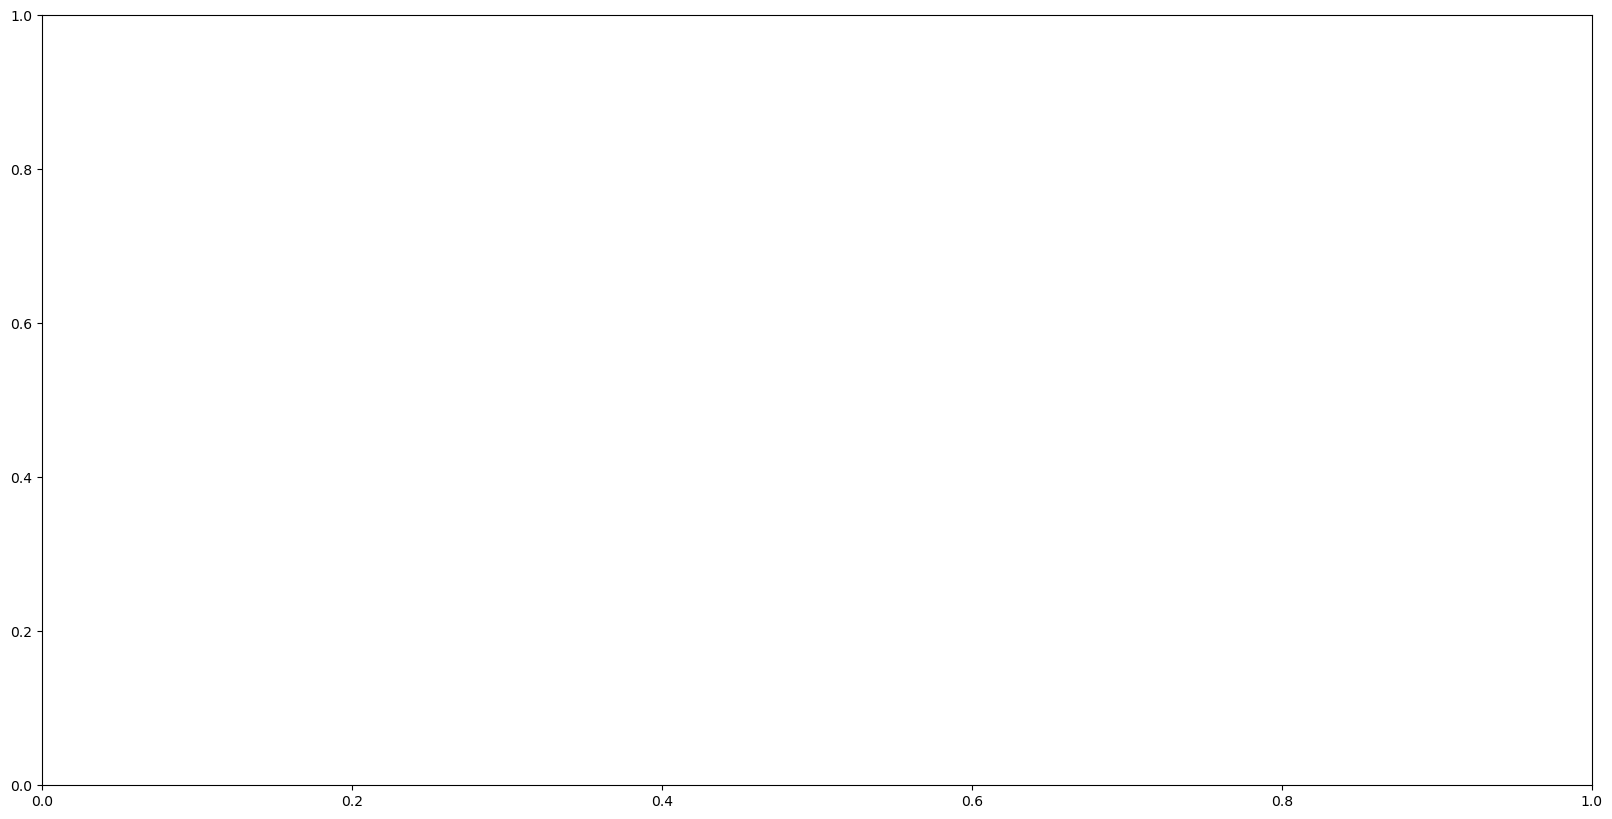

In [13]:
for name,last in data.items():
    if isinstance(last, tuple):
        Clean = last[0]
    else:
        Clean = last
        cleared = Clean.replace('\xa0','').strip()
        data[name] = cleared  
print(data)





In [ ]:
geodatasets.data

world = gpd.read_file('D:\datasheet')


print(world.head())


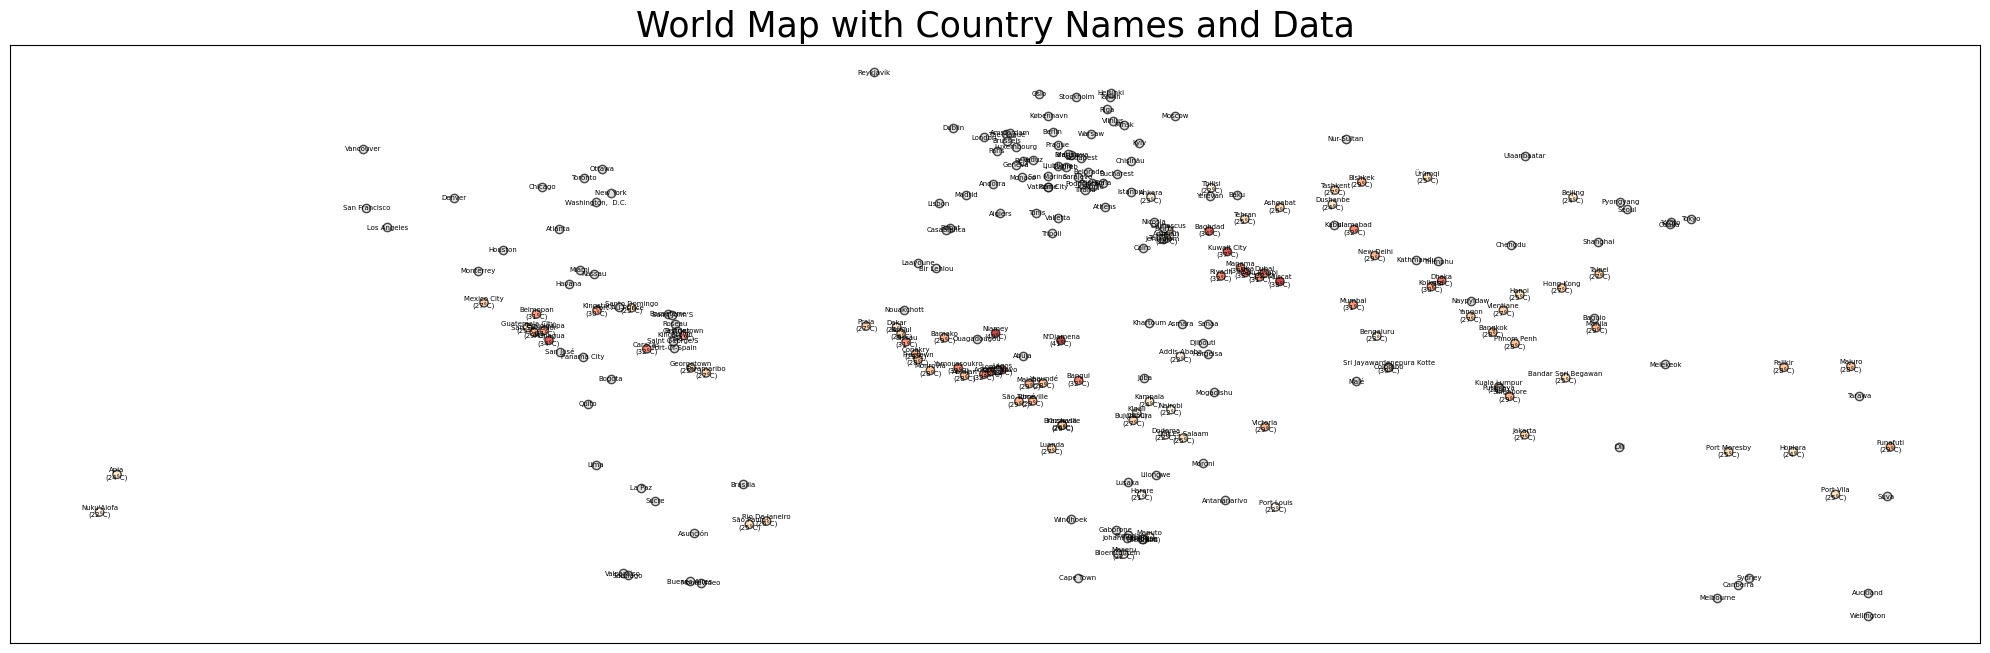

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read and merge data
framed_data = pd.DataFrame(list(data.items()), columns=['name', 'last'])
world = gpd.read_file(r'D:\datasheet')
world['name'] = world['name'].str.strip().str.title()
framed_data['name'] = framed_data['name'].str.strip().str.title()
merged = world.merge(framed_data, how='left', on='name')

# Plotting
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Plot world with data
merged.plot(
    ax=ax,
    column="last",        # Use "last" to color by your data
    cmap='OrRd',
    edgecolor="black",
    alpha=0.7,
    missing_kwds={"color": "lightgrey"}
)

# Add labels for each country with a 'last' value

for idx, row in merged.dropna(subset=['geometry']).iterrows():
    centroid = row['geometry'].centroid
    name = row['name']
    value = row['last']
    
    if pd.notnull(value):
        label = f"{name}\n({value})"
    else:
        label = name

    ax.text(
        centroid.x,
        centroid.y,
        label,
        fontsize=5,
        ha='center',
        va='center',
        color='black'
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("World Map with Country Names and Data", fontsize=25)
plt.tight_layout()
plt.show()
